<a href="https://colab.research.google.com/github/mervenilgun/Colab/blob/main/pokemon_verisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

?? Pokemon Veri Seti için hocanın Bizimle paylaştığı kendi çalışması

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/Pokemon.csv'
pokemon_df = pd.read_csv(file_path)

In [7]:
# Veri ön işleme
print("Veri seti boyutu:", pokemon_df.shape)
print("\nİlk 5 satır:")
print(pokemon_df.head())

Veri seti boyutu: (800, 13)

İlk 5 satır:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [8]:
# Eksik değerleri kontrol etme
print("\nEksik değerler:")
print(pokemon_df.isnull().sum())


Eksik değerler:
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [11]:
# Kategorik değişkenleri sayısallaştırma
le = LabelEncoder()
pokemon_df['Type 1'] = le.fit_transform(pokemon_df['Type 1'])
pokemon_df['Type 2'] = le.fit_transform(pokemon_df['Type 2'].fillna('None'))

In [15]:
# Özellik seçimi
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type 2']
X = pokemon_df[features]
y = pokemon_df['Type 1']

In [16]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")


Logistic Regression modeli eğitiliyor...

Random Forest modeli eğitiliyor...

Gradient Boosting modeli eğitiliyor...

SVM modeli eğitiliyor...

KNN modeli eğitiliyor...


In [31]:
# Model eğitimi
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [32]:
# Tahminler
y_pred = model.predict(X_test)

In [34]:
 # Sonuçları kaydetme
results[name] = {
'accuracy': accuracy_score(y_test, y_pred),
'classification_report': classification_report(y_test, y_pred)}

print(f"\n{name} Sonuçları:")
print(f"Doğruluk: {results[name]['accuracy']:.4f}")
print("\nSınıflandırma Raporu:")
print(results[name]['classification_report'])


KNN Sonuçları:
Doğruluk: 0.2062

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.09      0.22      0.13         9
           1       0.12      0.14      0.13         7
           2       0.17      0.50      0.25         4
           3       0.25      0.40      0.31        10
           4       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       0.06      0.14      0.08         7
           7       0.00      0.00      0.00         0
           8       0.29      0.20      0.24        10
           9       0.00      0.00      0.00        18
          10       0.50      0.38      0.43         8
          11       0.00      0.00      0.00         3
          12       0.35      0.47      0.40        15
          13       0.00      0.00      0.00         8
          14       0.67      0.12      0.21        16
          15       1.00      0.18      0.31        11
          16       0.14  

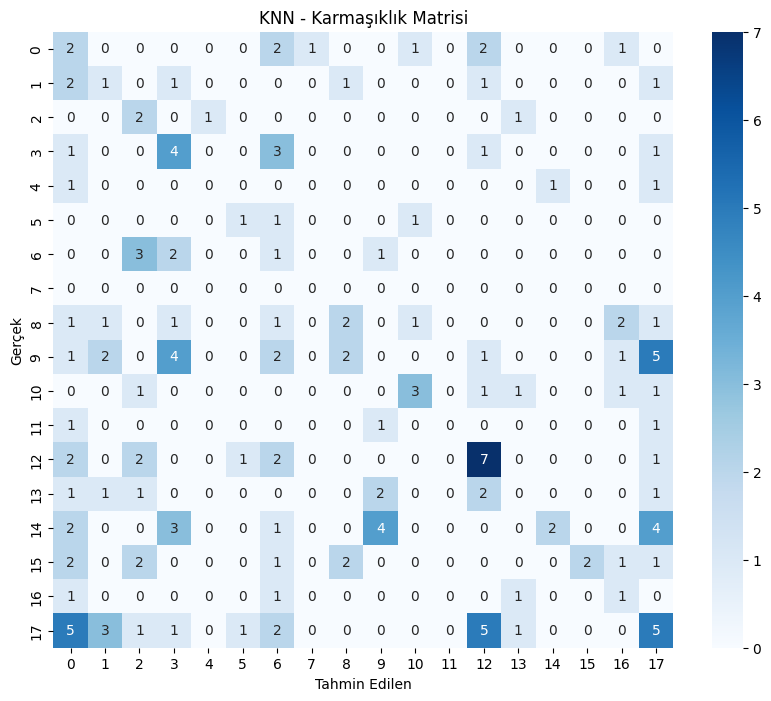

In [35]:

 # Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'{name} - Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

In [36]:
# En iyi modeli bulma
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"\nEn iyi model: {best_model_name} (Doğruluk: {results[best_model_name]['accuracy']:.4f})")



En iyi model: KNN (Doğruluk: 0.2062)


In [37]:
# En iyi model için hiper parametre optimizasyonu
print(f"\n{best_model_name} için hiper parametre optimizasyonu yapılıyor...")


KNN için hiper parametre optimizasyonu yapılıyor...


In [38]:
#Hiper parametre dağılımlarını tanımlama
param_distributions = {
    'Logistic Regression': {
        'lr__C': [0.1, 1.0, 10.0, 100.0],
        'lr__penalty': ['l1', 'l2'],
        'lr__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    },
    'SVM': {
        'svm__C': [0.1, 1.0, 10.0],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 'auto']
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    }
}

In [39]:
# RandomizedSearchCV için model ve parametre dağılımını seçme
model = models[best_model_name]
param_dist = param_distributions[best_model_name]

In [40]:
# RandomizedSearchCV ile hiper parametre optimizasyonu
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [41]:
# RandomizedSearchCV'yi çalıştırma
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan'],
                                        'knn__n_neighbors': [3, 5, 7, 9],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, scoring='accuracy', verbose=2)

In [42]:
# En iyi parametreleri ve skoru yazdırma
print("\nEn iyi parametreler:")
print(random_search.best_params_)
print(f"\nEn iyi cross-validation skoru: {random_search.best_score_:.4f}")


En iyi parametreler:
{'knn__weights': 'distance', 'knn__n_neighbors': 9, 'knn__metric': 'euclidean'}

En iyi cross-validation skoru: 0.2422


In [43]:
# En iyi model ile test seti üzerinde tahmin
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [44]:
# Test seti sonuçlarını yazdırma
print("\nTest seti sonuçları:")
print(f"Doğruluk: {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Test seti sonuçları:
Doğruluk: 0.2375

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.21      0.33      0.26         9
           1       0.00      0.00      0.00         7
           2       0.25      0.50      0.33         4
           3       0.40      0.40      0.40        10
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.07      0.14      0.09         7
           8       0.25      0.10      0.14        10
           9       0.31      0.28      0.29        18
          10       0.38      0.38      0.38         8
          11       0.00      0.00      0.00         3
          12       0.32      0.47      0.38        15
          13       0.00      0.00      0.00         8
          14       0.50      0.19      0.27        16
          15       0.33      0.09      0.14        11
          16       0.14      0.25      0.18         4
          17       

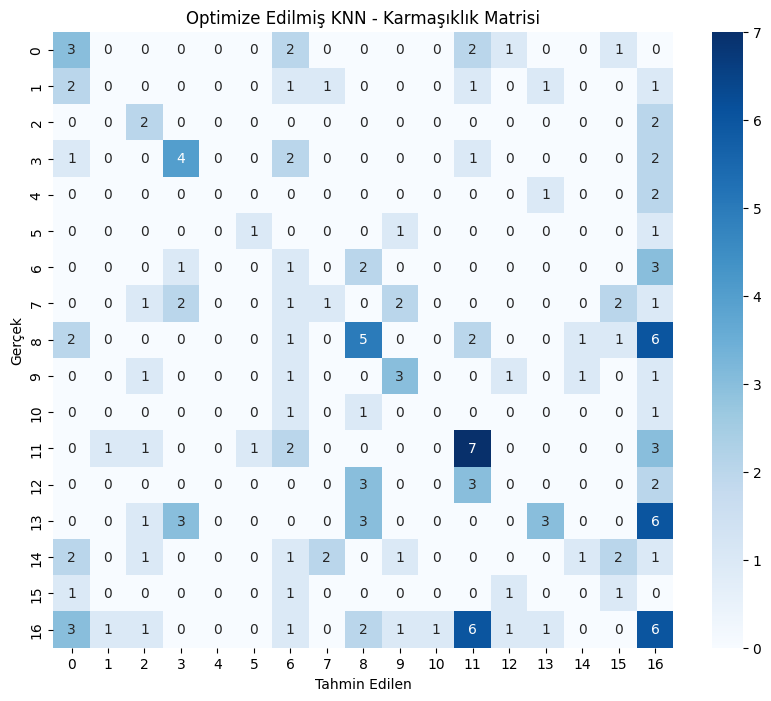

In [45]:
# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Optimize Edilmiş {best_model_name} - Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

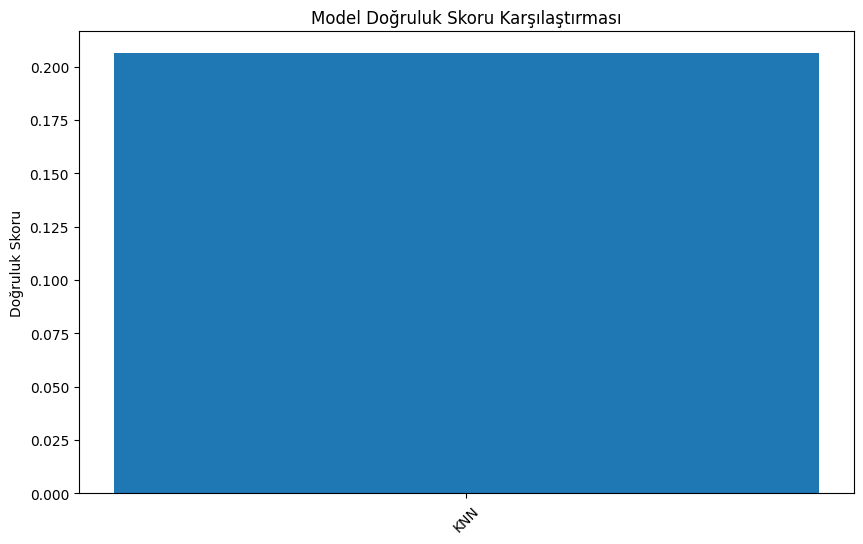

In [46]:
# Tüm modellerin doğruluk skorlarını karşılaştırma
accuracies = {name: result['accuracy'] for name, result in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Doğruluk Skoru Karşılaştırması')
plt.xticks(rotation=45)
plt.ylabel('Doğruluk Skoru')
plt.show()